# **Serie de Fourier**

In [51]:
import sympy as smp
import matplotlib.pyplot as plt
from sympy.plotting import plot
from sympy.plotting import plot3d

## _Serie Coseno de Fourier_

Se definen los simbolos m y n como numeros enteros positivos

In [52]:
m,n = smp.symbols('m n', integer=True, postive=True)

Se define:
- Simbolo x
- Funcion summ como sumatorio
- Funciones f,A y B

In [53]:
x = smp.symbols('x')
summ =smp.Function('summ')
f =smp.Function('f')
A=smp.Function('A')
B=smp.Function('B')

Se define f como funcion respecto a x \
Se define A,B como funciones respecto a m

In [54]:
f = f(x)
A=A(m)
B=B(m)

Definimos las siguiente funcion a tramos:
$$ 
f(x) = 
\begin{cases}
1 & -1 \lt x \lt 0 \\
1 & 0 \lt x \lt 1 \\
0 & \text{resto}
\end{cases}
$$

In [55]:
f = smp.Piecewise(
    (1, (-1 < x)& (x < 0)),
    (1,(0<x)&(x<1)),
    ( 0, True )
)

In [56]:
f

Piecewise((1, ((x > -1) | (x > 0)) & ((x > -1) | (x < 1)) & ((x > 0) | (x < 0)) & ((x < 0) | (x < 1))), (0, True))

Calculamos la integral de coseno cuadrado para normalizar cada termino

In [57]:
CosMdotCosM = smp.integrate(smp.cos(m*x)*smp.cos(m*x),(x,-smp.pi,smp.pi)).simplify()

In [58]:
CosMdotCosM

Piecewise((pi, (m > 0) | (m < 0)), (2*pi, True))

Calcula Am:
$$
A_m = \frac{\int_{-\pi}^{\pi} f(x)cos(mx)dx}{\int_{-\pi}^{\pi} cos^2(mx)dx}
$$

In [59]:
integrandA = f*smp.cos(m*x)/CosMdotCosM

In [60]:
A = smp.integrate(integrandA,(x,-smp.pi,smp.pi)).simplify()
A

Piecewise((2*sin(m)/(pi*m), (m > 0) | (m < 0)), (1/pi, True))

Hacemos el sumatorio:
$$
f(x) = A_0 + \sum_{i=1}^{\infty}A_m cos(\frac{m\pi}{L}x)
$$
Como L es $\pi$:
$$
f(x) = A_0 + \sum_{i=1}^{\infty}A_m cos(mx)
$$
con:
$$
A_0 = \frac{1}{2\pi} \int_{-\pi}^{\pi}f(x)dx
$$

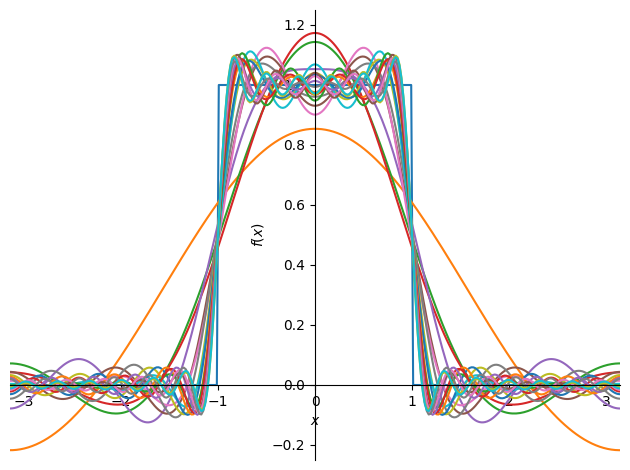

In [61]:
n = 20
summ = 0
A0 = (1/(2*smp.pi))*smp.integrate(f,(x,-smp.pi,smp.pi))
summ = summ + A0
grp = plot(f,show=False,xlim=[-smp.pi,smp.pi],ylim=[-0.25,1.25])
for i in range(1,n):
    summ = summ + A.subs(m,i)*smp.cos(i*x)
    dl = plot(summ,show=False)
    grp.extend(dl)
grp.show()

## _Serie Seno de Fourier_

In [62]:
m,n = smp.symbols('m n', integer=True, postive=True)
x = smp.symbols('x')

summ =smp.Function('summ')
f =smp.Function('f')
A=smp.Function('A')
B=smp.Function('B')

f = f(x)
A=A(m)
B=B(m)

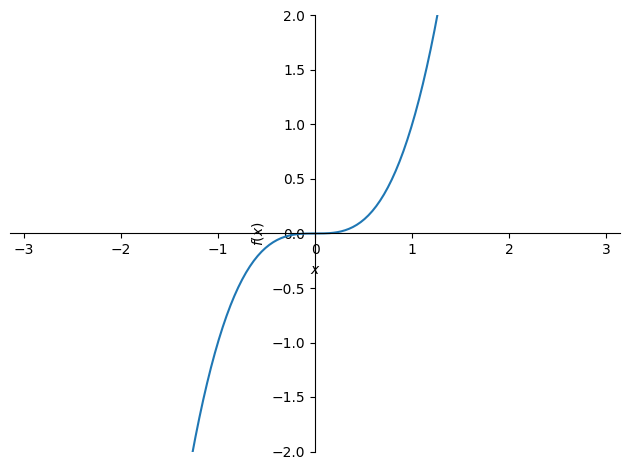

In [63]:
f = x**3
plot(f,show=True,xlim=[-smp.pi,smp.pi],ylim=[-2,2])

In [64]:
SinMdotSimM = smp.integrate(smp.sin(m*x)*smp.sin(m*x),(x,-smp.pi,smp.pi)).simplify()
SinMdotSimM

Piecewise((pi, (m > 0) | (m < 0)), (0, True))

$$
A_m = \frac{\int_{-\pi}^{\pi} f(x)sin(mx)dx}{\int_{-\pi}^{\pi} sin^2(mx)dx}
$$

In [65]:
integrandA = f*smp.sin(m*x)/SinMdotSimM
integrandA

x**3*Piecewise((1/pi, (m > 0) | (m < 0)), (zoo, True))*sin(m*x)

In [66]:
A = smp.integrate(integrandA,(x,-smp.pi,smp.pi)).simplify()
A

Integral(Piecewise((x**3*sin(m*x)/pi, (m > 0) | (m < 0)), (zoo*x**3*sin(m*x), True)), (x, -pi, pi))

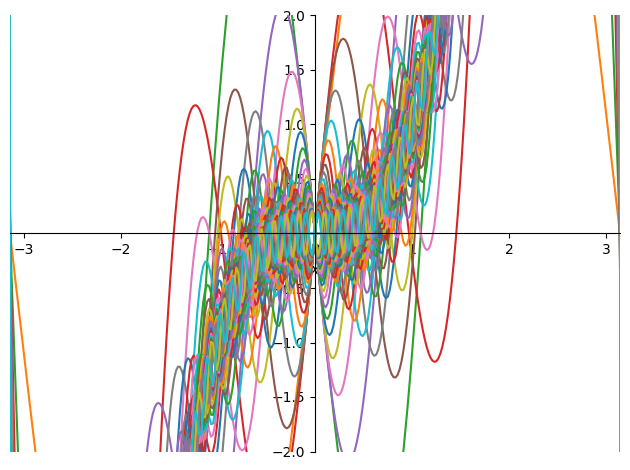

In [69]:
summ = 0
n = 50

grp = plot(f,show=False,xlim=[-smp.pi,smp.pi],ylim=[-2,2])

for i in range(1,n):
    coeff = A.subs(m, i).doit()
    summ = summ + coeff*smp.sin(i*x)

    dl = plot(summ,show=False)
    grp.extend(dl)

grp.show()

## _Serie Completa de Fourier_